# Chi-Squared goodness of fit

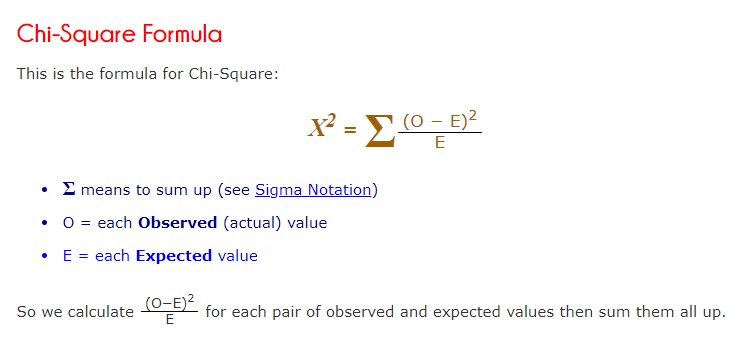

#### Let's generate some fake demographic data for India and any one state of India and walk through the chi-square goodness of fit test to check whether they are different:


In [5]:
from scipy import stats
import pandas as pd

In [26]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["other"]*35000)          

state = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
state_table = pd.crosstab(index=state[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(state_table)

National
col_0      count
0               
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
black       250
hispanic    300
other       150
white       600


In [27]:
observed = state_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(state)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    17.884615
dtype: float64


# Test of Independence

Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another.

For instance, the month you were born probably doesn't tell you anything which web browser you use, so we'd expect birth month and browser preference to be independent.

On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.

The chi-squared test of independence tests whether two categorical variables are independent.

In [21]:
# Let's test if knowing LandContour which is the overall flatness of the property tells us anything about the price

# For this let's divide the SalePrice in three buckets - High, Medium, Low

import scipy.stats as sp
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return


price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285


 The low p-value tells us that the two variables aren't independent and knowing the LandContour of a house does tells us something about its SalePrice.